# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./input/Profissao- Cientista de Dados_M10_support material.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [4]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
qualitativas = df.select_dtypes(include=['object', 'boolean']).columns

In [5]:
print(df[qualitativas].info())
df[qualitativas]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sexo              15000 non-null  object
 1   posse_de_veiculo  15000 non-null  bool  
 2   posse_de_imovel   15000 non-null  bool  
 3   tipo_renda        15000 non-null  object
 4   educacao          15000 non-null  object
 5   estado_civil      15000 non-null  object
 6   tipo_residencia   15000 non-null  object
 7   mau               15000 non-null  bool  
dtypes: bool(3), object(5)
memory usage: 630.0+ KB
None


,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,M,True,True,Empresário,Secundário,Casado,Casa,False
2,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,F,True,False,Empresário,Secundário,Casado,Casa,False
4,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...
14995,M,True,True,Assalariado,Secundário,Casado,Casa,False
14996,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False
14997,F,True,True,Assalariado,Secundário,Casado,Casa,False
14998,F,False,True,Servidor público,Superior completo,Casado,Casa,False


In [6]:
df_copia = df.copy()

for col in df_copia[qualitativas]:
    if df_copia[col].dtype == bool:
        df_copia[col] = df_copia[col].map({True: 'Sim', False: 'Não'})

df_copia

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,Não,Sim,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,Não,3369.24
1,1,2015-01-01,12830,M,Sim,Sim,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,Não,6096.14
2,2,2015-01-01,2885,M,Sim,Sim,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,Não,5658.98
3,3,2015-01-01,16168,F,Sim,Não,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,Não,7246.69
4,4,2015-01-01,12438,M,Não,Não,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,Não,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,Sim,Sim,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,Não,1193.29
14996,14996,2016-03-01,3405,M,Sim,Sim,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,Não,2519.18
14997,14997,2016-03-01,7944,F,Sim,Sim,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,Não,1586.85
14998,14998,2016-03-01,16019,F,Não,Sim,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,Não,6975.39


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

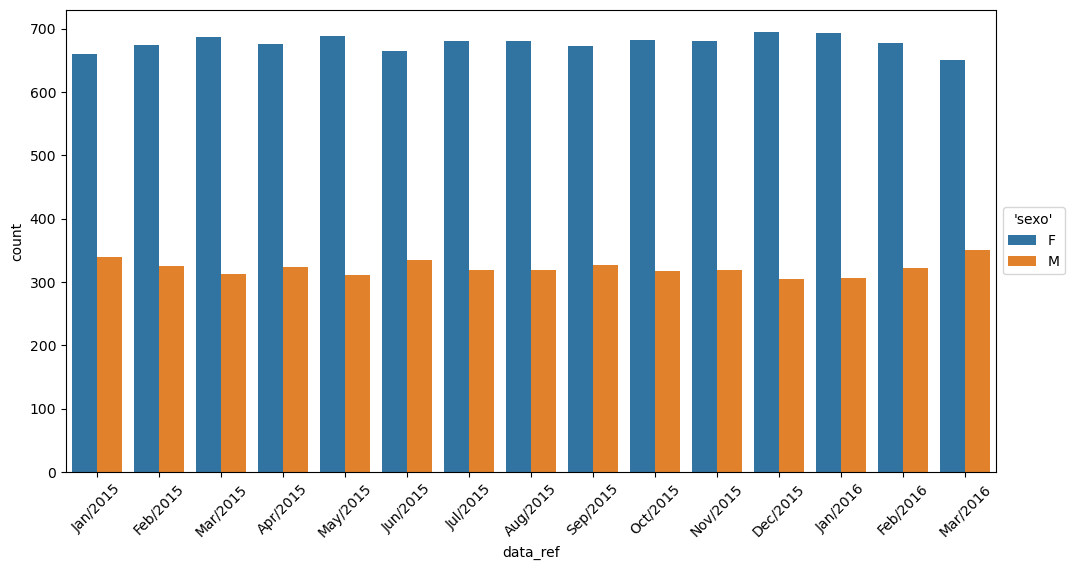

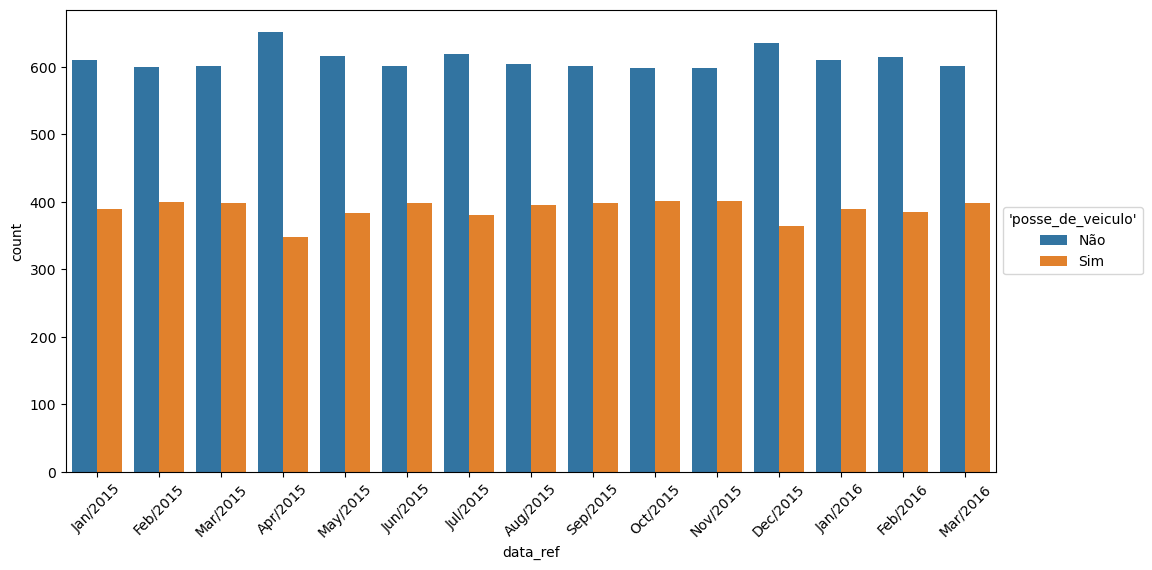

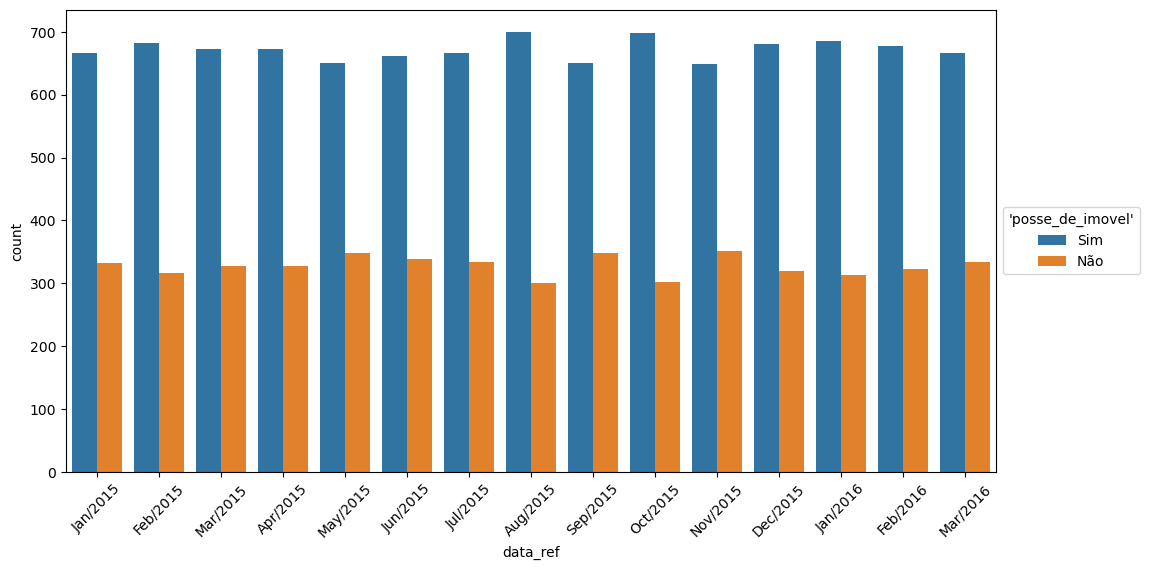

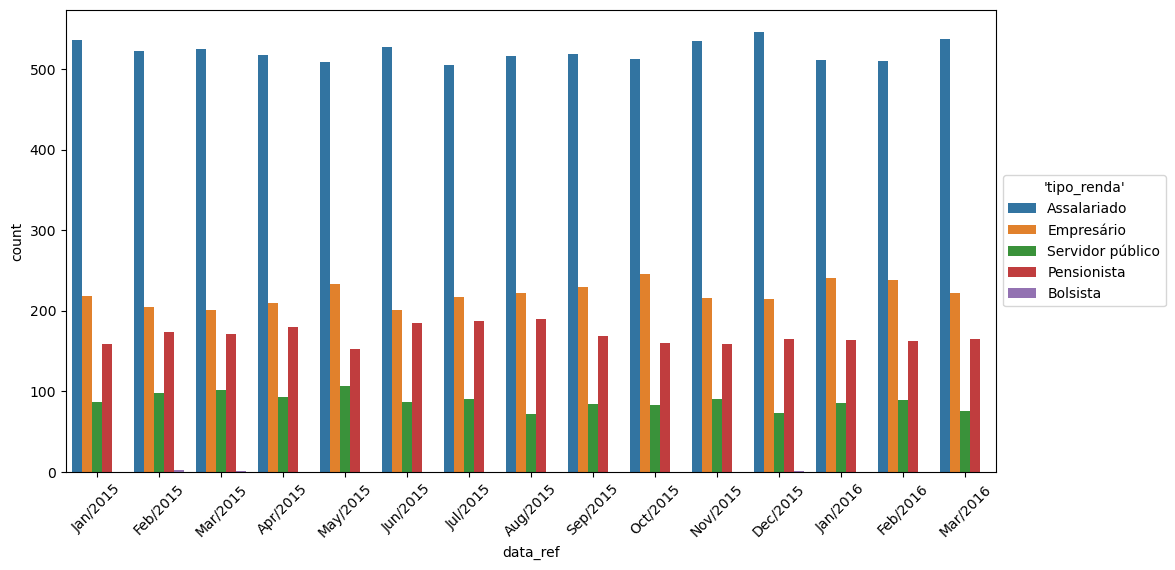

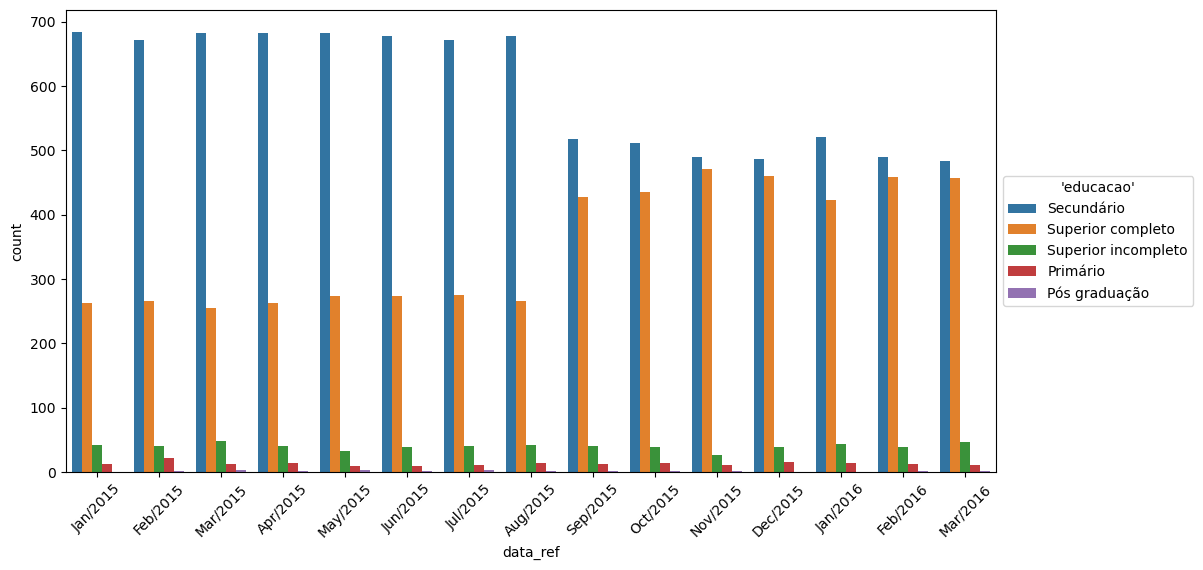

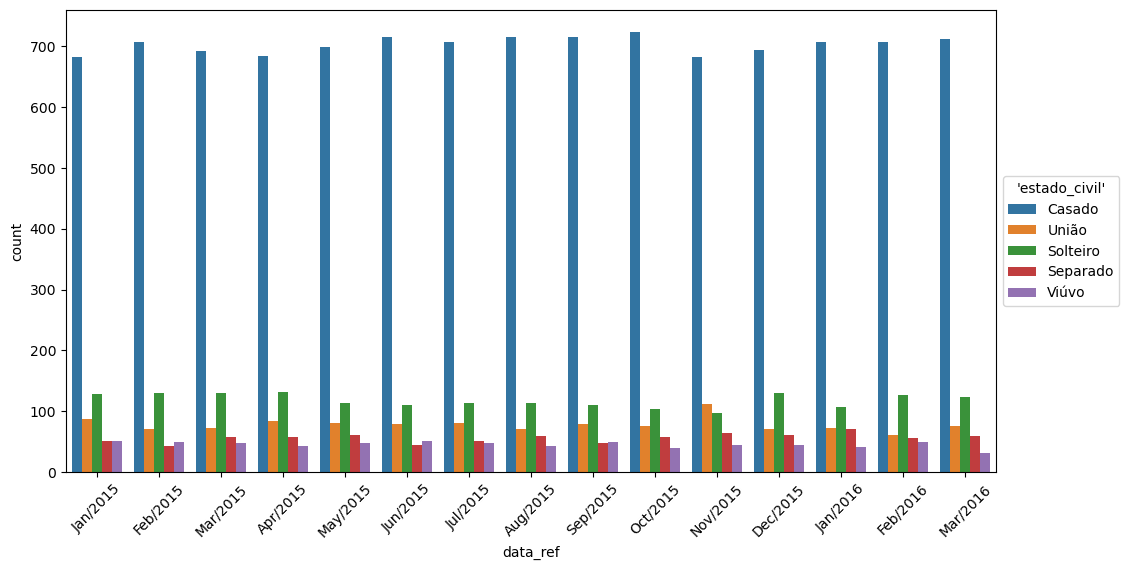

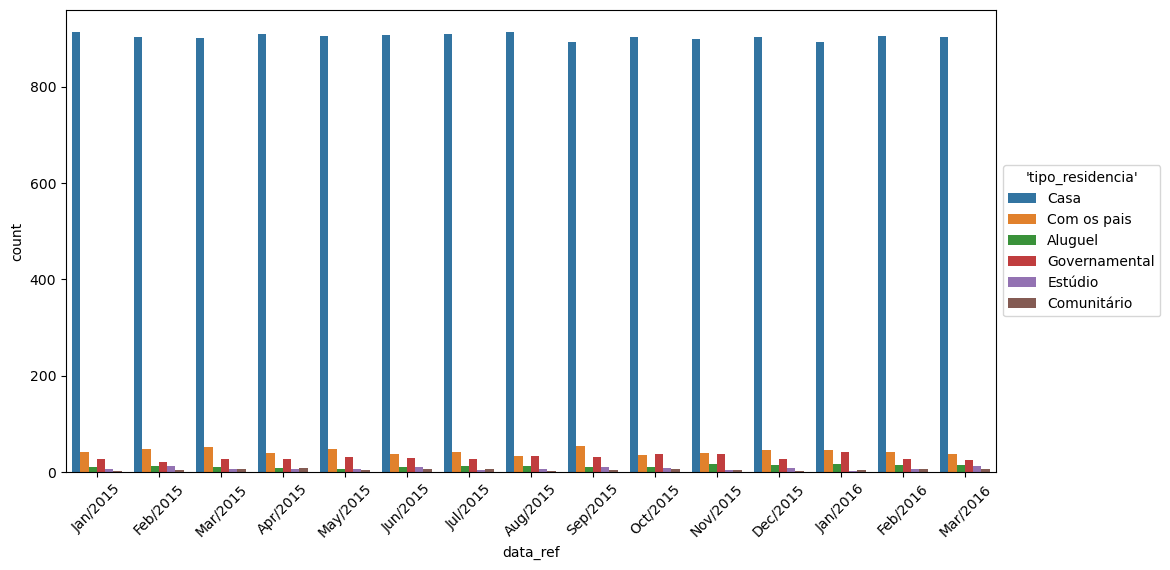

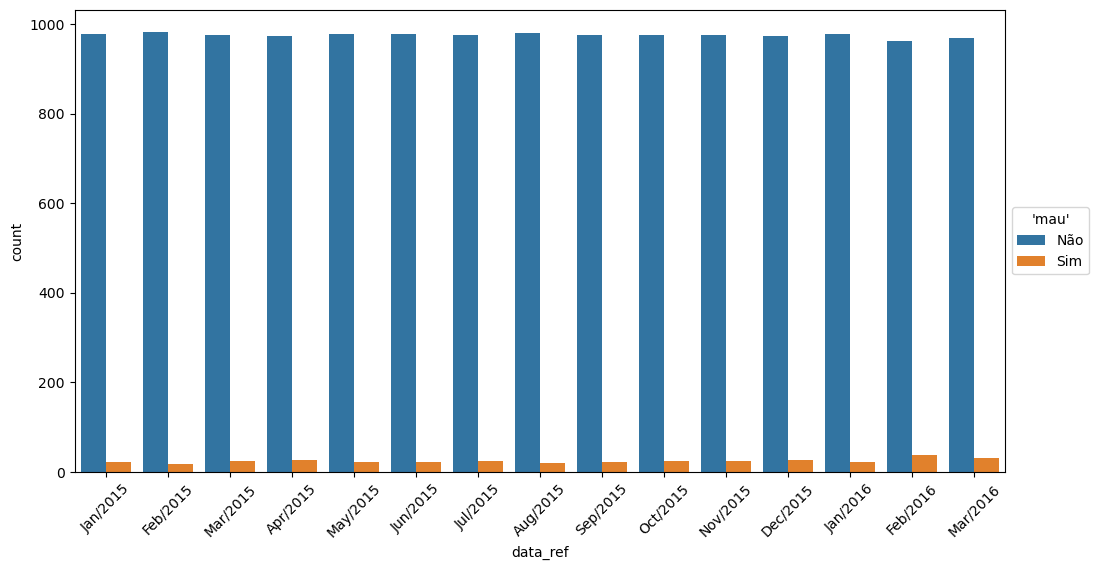

In [7]:
plt.rc('figure', figsize=(12,6))

for col in qualitativas:
    ax = sns.countplot(x='data_ref', hue=col, data=df_copia)
    tick_labels = df_copia['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()

    ax.set_xticklabels(labels=tick_labels, rotation=45)
    ax.legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    plt.show()

# Resposta:

Dentre todos os gráficos apresentados, uma das variáveis qualitativas que se destaca das demais é a "educacao". Ao longo do tempo, a partir de setembro de 2015, houve um aumento significativo de dados com a escolaridade de ensino superior completo, o que resultou em uma queda na quantidade de dados com a escolaridade secundária. A distribuição manteve a mesma proporção até o final do período analisado, e seria importante investigar essa mudança.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

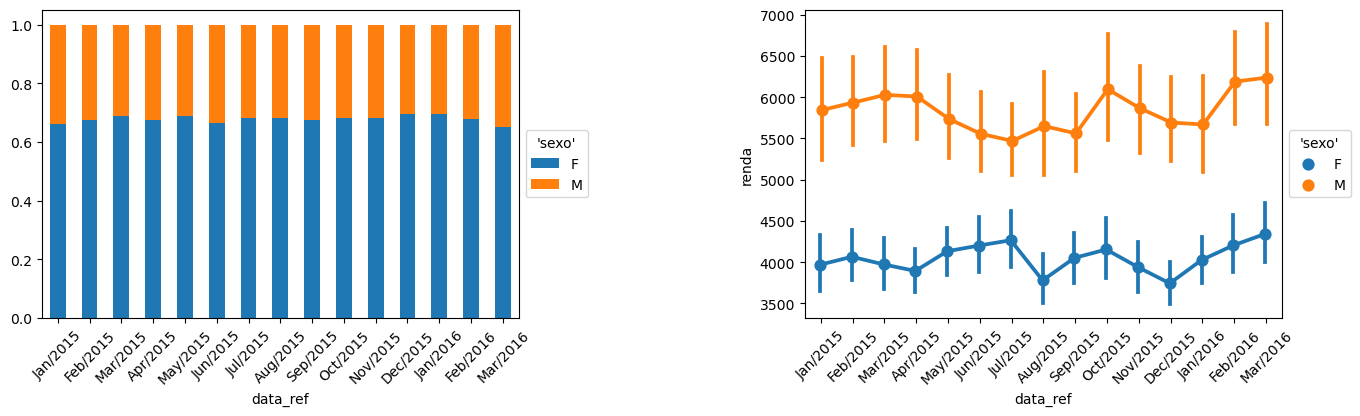

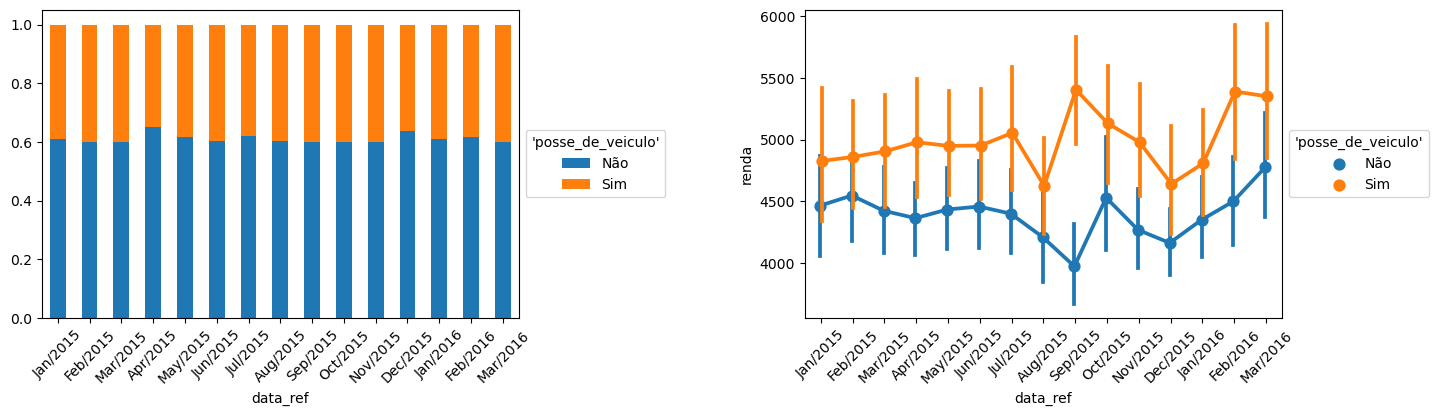

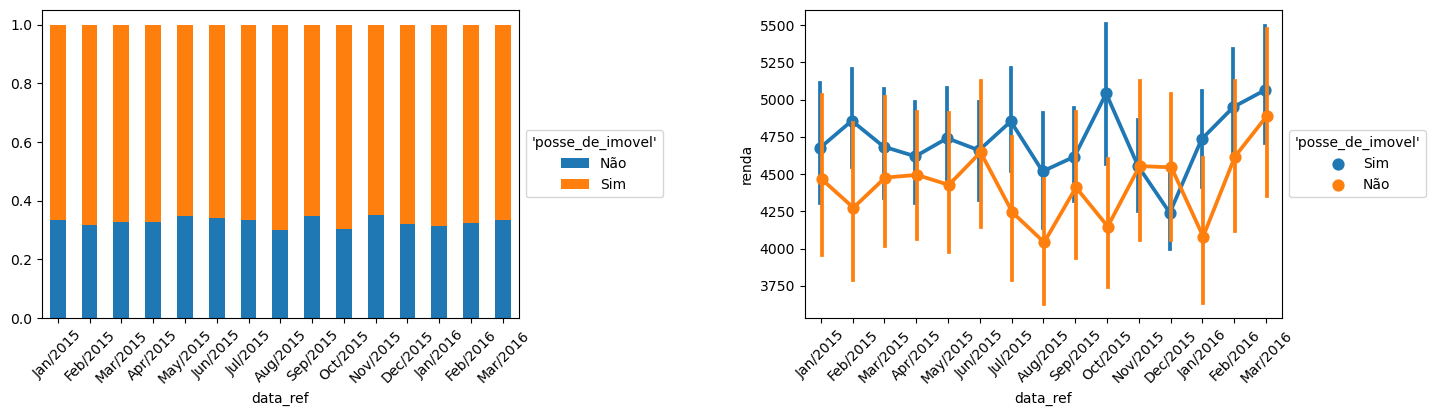

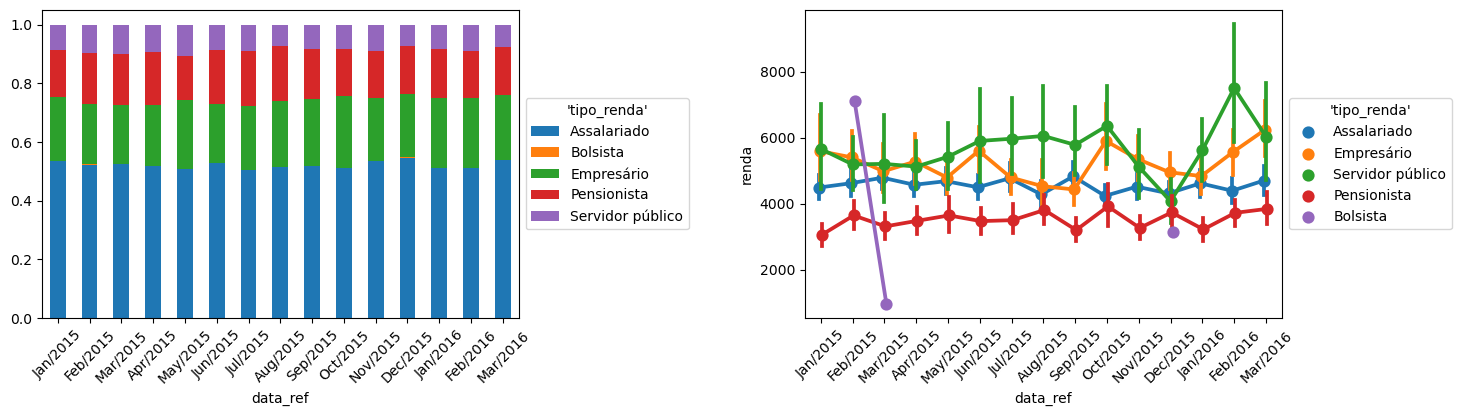

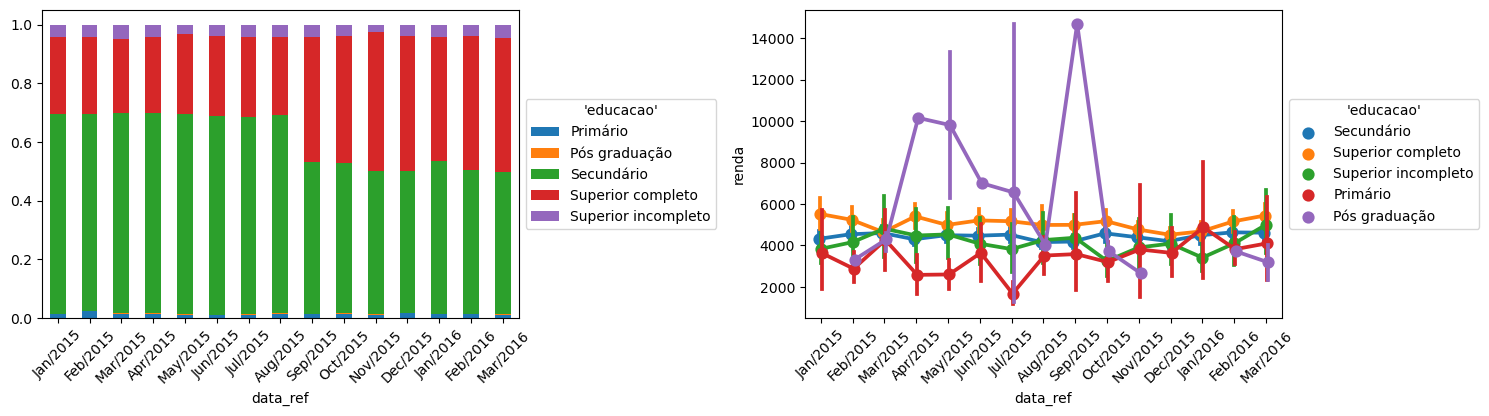

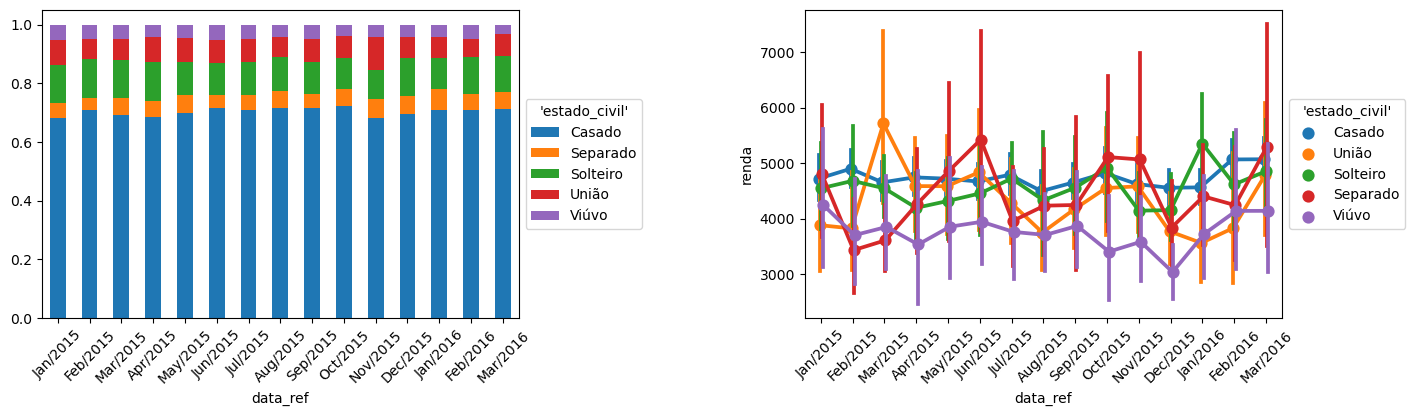

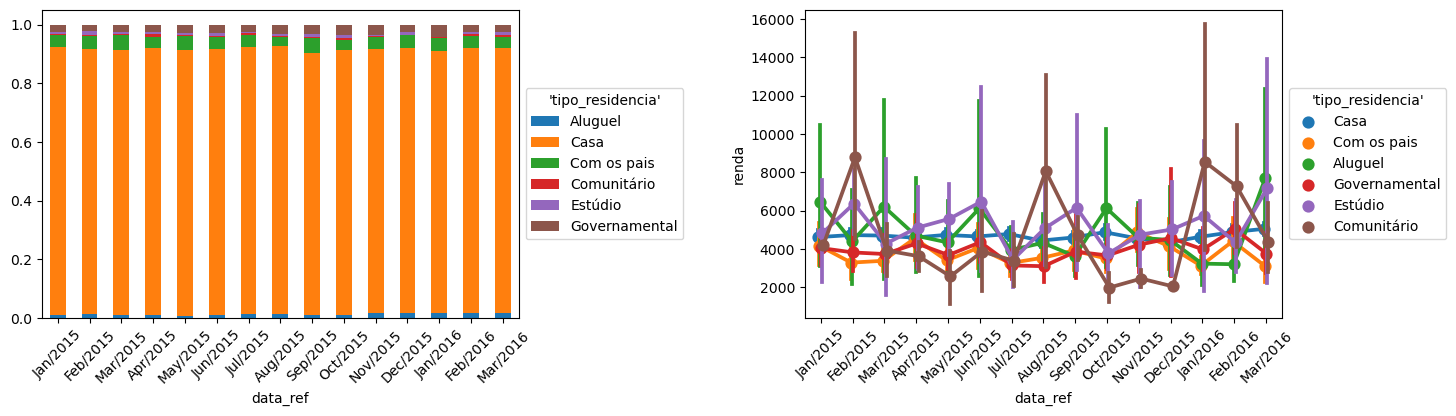

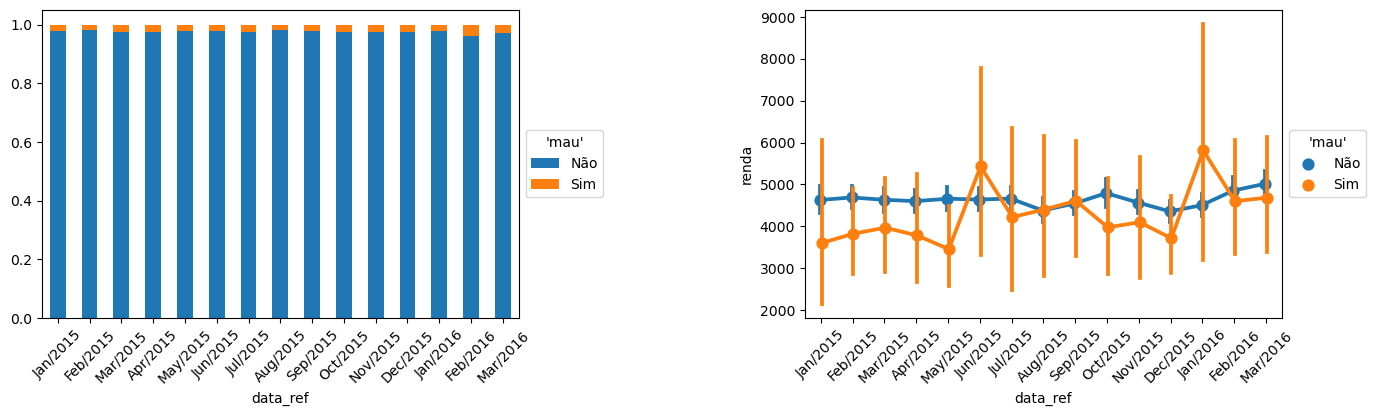

In [8]:
plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(1,2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = df_copia['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()

    df_crosstab = pd.crosstab(index=df_copia['data_ref'], 
                              columns=df_copia[col], 
                              normalize='index')
    ax0 = df_crosstab.plot.bar(stacked=True, ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df_copia, dodge=True, errorbar=('ci', 95), ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    plt.show()

# Resposta:
Conforme descrito na resposta do exercício anterior, houve uma alteração na variável "educacao", que resultou em uma diferença em praticamente metade do período analisado. Com exceção da variável "educacao", todas as outras variáveis qualitativas podem ser utilizadas em um modelo devido à estabilidade da distribuição ao longo do tempo